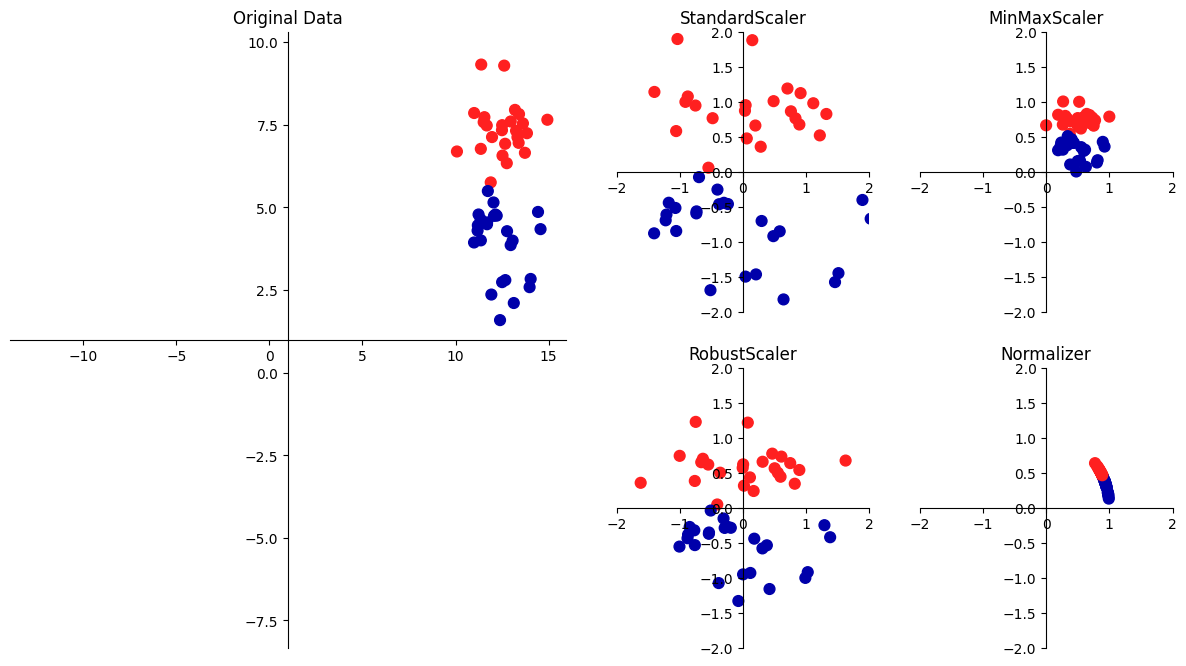

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy
mglearn.plots.plot_scaling()

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape,X_test.shape)

(426, 30) (143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler().fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

In [4]:
from sklearn.svm import SVC
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy:{:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy:0.94


In [5]:
svm.fit(X_train_scale,y_train)
print("Test set accuracy:{:.3f}".format(svm.score(X_test_scale,y_test)))

Test set accuracy:0.972


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)
svm.fit(X_train_scale,y_train)
print("Test set accuracy:{:.3f}".format(svm.score(X_test_scale,y_test)))

Test set accuracy:0.965


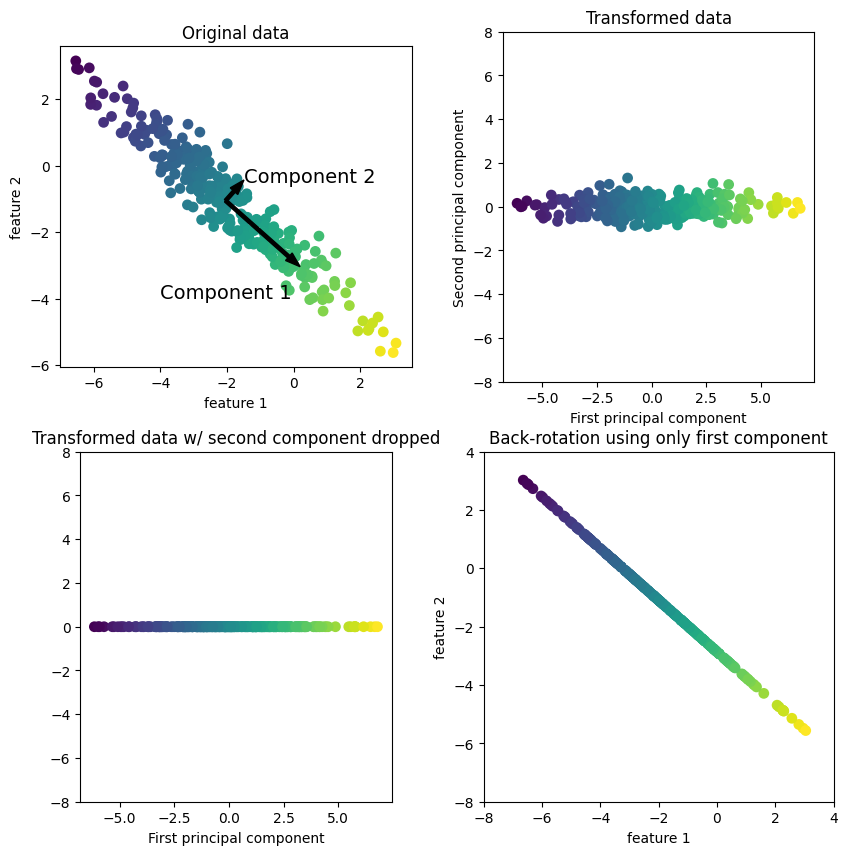

In [7]:
mglearn.plots.plot_pca_illustration()

In [8]:
from sklearn.decomposition import PCA
scaler=StandardScaler().fit(cancer.data)
X_scale=scaler.transform(cancer.data)
pca=PCA(n_components=2)
pca.fit(X_scale)
X_pca=pca.transform(X_scale)
print("Original shape:{}".format(str(X_scale.shape)))
print("Original shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Original shape:(569, 2)


Text(0, 0.5, 'Second principal component')

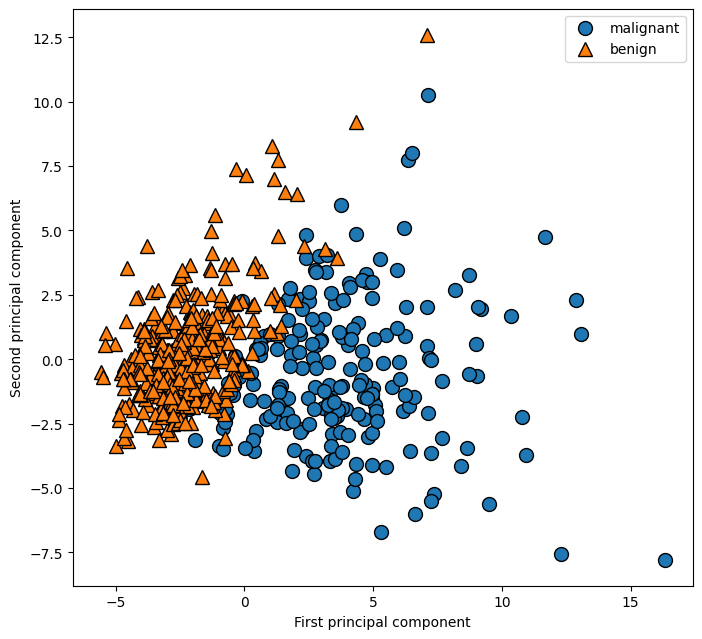

In [9]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

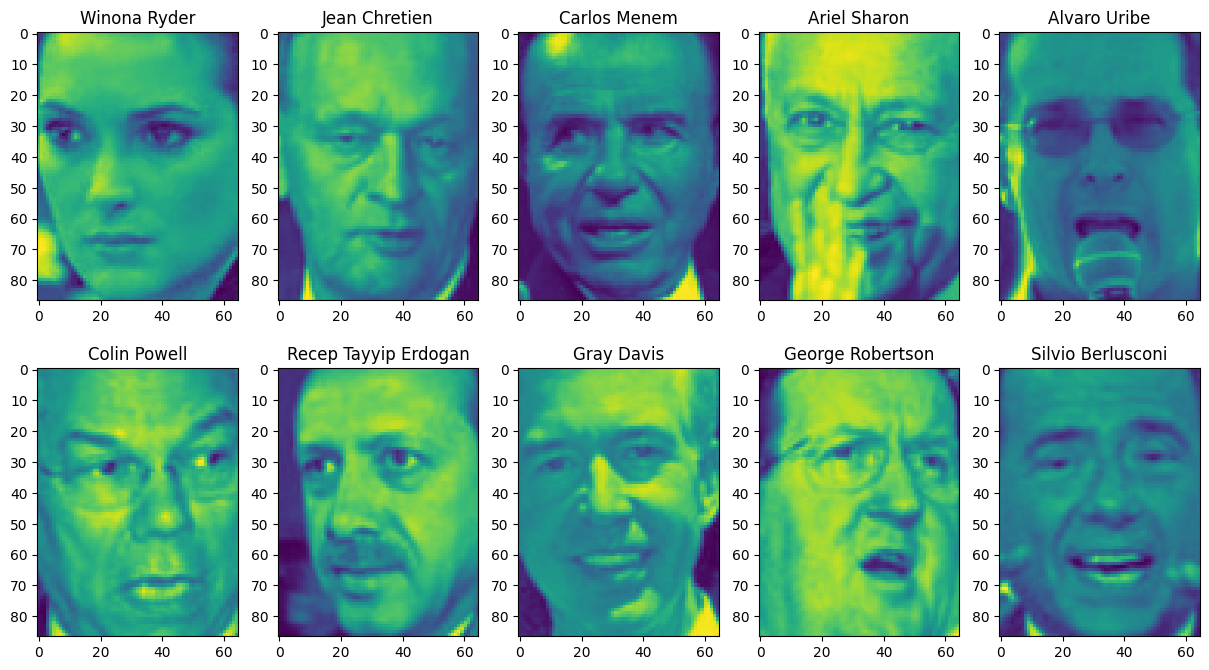

In [10]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape

fig,axes=plt.subplots(2,5,figsize=(15,8))
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
counts=numpy.bincount(people.target)
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end="   ")
    if (i+1)%3==0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [29]:
mask=numpy.zeros(people.target.shape,dtype=bool)
for target in numpy.unique(people.target):
    mask[numpy.where(people.target==target)[0][:50]]=1
    
X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/255

In [32]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.22


In [34]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca shape:{}".format(X_train_pca.shape))

X_train_pca shape:(1547, 100)


In [36]:
knn=KNeighborsClassifier(n_neighbors=1).fit(X_train_pca,y_train)
print("Test set score: {:.2f}".format(knn.score(X_test_pca,y_test)))

Test set score: 0.30
